In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
import pandas as pd
import astropy.io.fits
import numpy as np
import glob
import sys
#sys.path.pop(0)

# Import ccf code
import crosscorr
from crosscorr import mask

## Grab some GJ699 files

In [2]:
files = glob.glob('../crosscorr/data/hpf/spectra/gj699/*.fits')
files

['../crosscorr/data/hpf/spectra/gj699/Slope-20180428T082906_R01.optimal.fits']

Text(0, 0.5, 'Flux')

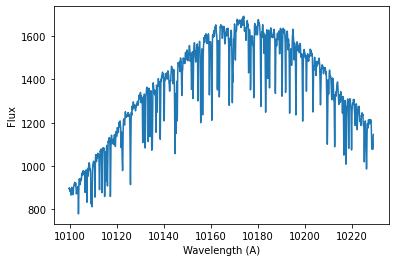

In [3]:
# Quickly get wavelengths and fluxes
# In principle we shoudl be using the sky-subtracted and flat fielded data here. 
# Just doing this to quickly illustrate how the code works
filename = files[0]
berv = 21. #km/s for file 0
w = astropy.io.fits.open(filename)[7].data
f = astropy.io.fits.open(filename)[1].data

fig, ax = plt.subplots()
o = 15
ax.plot(w[o],f[o])
ax.set_xlabel("Wavelength (A)")
ax.set_ylabel("Flux")

In [4]:
# Define mask
M = mask.Mask(filename="../crosscorr/data/hpf/masks/specmatch_mask.mas",disp=2.,constant_v=True)

# Define velocity to 
v = np.linspace(-125,125,161)

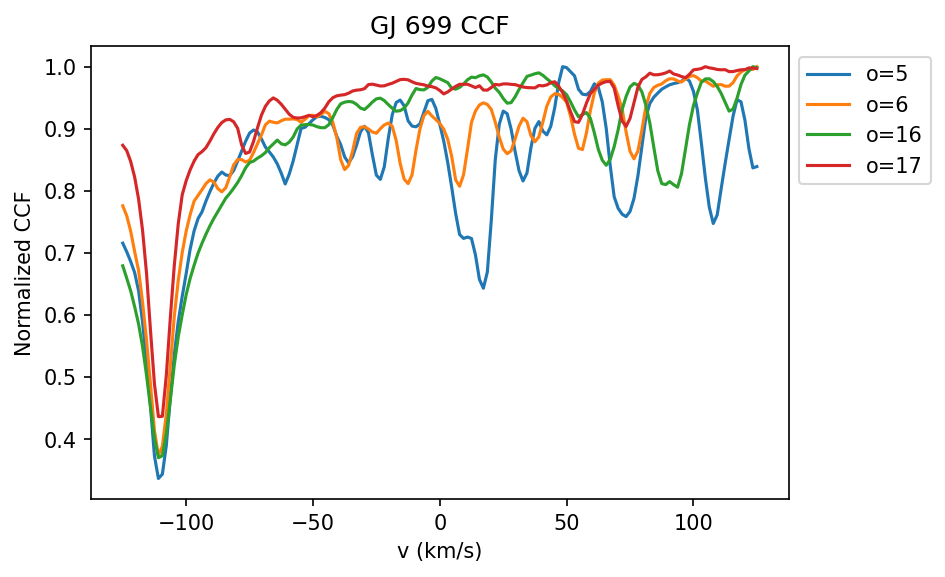

In [5]:
orders = [5,6,16,17]

fig, ax = plt.subplots(dpi=150)

for o in orders:
    c = crosscorr.calculate_ccf(w[o],f[o],v,M.wi,M.wf,M.weight,berv=21.,method='doppler_3d')
    ax.plot(v,c/np.max(c),label="o={}".format(o))

ax.set_ylabel("Normalized CCF")
ax.set_xlabel("v (km/s)")
ax.set_title("GJ 699 CCF")
ax.legend(bbox_to_anchor=(1.,1.))

# Using convenience function

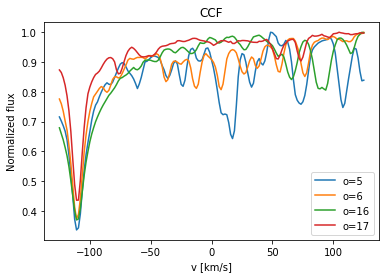

In [6]:
ccfs = crosscorr.calculate_ccf_for_hpf_orders(w,f,v,M,berv=21.,orders=[5,6,16,17],plot=True)